## Load Libraries

In [1]:
library(tidyverse)
library(Seurat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘

## Load the processed Seurat object

In [5]:
seurat_obj <- readRDS("../data/singlecell/processed_counts/p1_t1_processed.rds")

In [6]:
seurat_obj

An object of class Seurat 
15044 features across 1436 samples within 1 assay 
Active assay: RNA (15044 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, umap, tsne

## Extract raw count and processed count 

In [8]:
# Get raw counts from Seurat object
raw_counts <- GetAssayData(seurat_obj, slot = "counts")

# Convert to data frame
raw_counts_df <- as.data.frame(as.matrix(raw_counts))

# Save as CSV
write.csv(raw_counts_df, file = "../data/singlecell/raw_counts/P1_T1/p1_t1_raw_counts.csv")

In [9]:
raw_counts_df[1:10, 1:5]  # Display first 5 rows and columns

,AAACCTGCACTCGACG-1,AAACCTGTCGGTCCGA-1,AAACGGGAGCCTATGT-1,AAACGGGAGGCGACAT-1,AAACGGGCACGCTTTC-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL627309.1,0,0,0,0,0
AL669831.5,0,0,0,0,0
LINC00115,0,0,0,0,0
FAM41C,0,0,0,1,0
NOC2L,0,0,0,0,0
KLHL17,0,0,0,0,0
PLEKHN1,0,0,0,0,0
AL645608.8,0,0,0,0,0
HES4,0,0,0,0,0


In [10]:
# Get normalized counts from Seurat object
normalized_counts <- GetAssayData(seurat_obj, slot = "scale.data")

# Convert to data frame
normalized_counts_df <- as.data.frame(as.matrix(normalized_counts))

# Save as CSV
write.csv(normalized_counts_df, file = "../data/singlecell/processed_counts/p1_t1_normalized_counts.csv")

In [11]:
normalized_counts_df[1:10, 1:5]  # Display first 5 rows and columns

,AAACCTGCACTCGACG-1,AAACCTGTCGGTCCGA-1,AAACGGGAGCCTATGT-1,AAACGGGAGGCGACAT-1,AAACGGGCACGCTTTC-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL627309.1,-0.03690321,-0.03690321,-0.03690321,-0.03690321,-0.03690321
AL669831.5,-0.12324993,-0.12324993,-0.12324993,-0.12324993,-0.12324993
LINC00115,-0.10663470,-0.10663470,-0.10663470,-0.10663470,-0.10663470
FAM41C,-0.19220235,-0.19220235,-0.19220235,4.35413303,-0.19220235
NOC2L,-0.30680401,-0.30680401,-0.30680401,-0.30680401,-0.30680401
KLHL17,-0.03691665,-0.03691665,-0.03691665,-0.03691665,-0.03691665
PLEKHN1,-0.08750623,-0.08750623,-0.08750623,-0.08750623,-0.08750623
AL645608.8,-0.05787025,-0.05787025,-0.05787025,-0.05787025,-0.05787025
HES4,-0.23591446,-0.23591446,-0.23591446,-0.23591446,-0.23591446


## Check the clusters

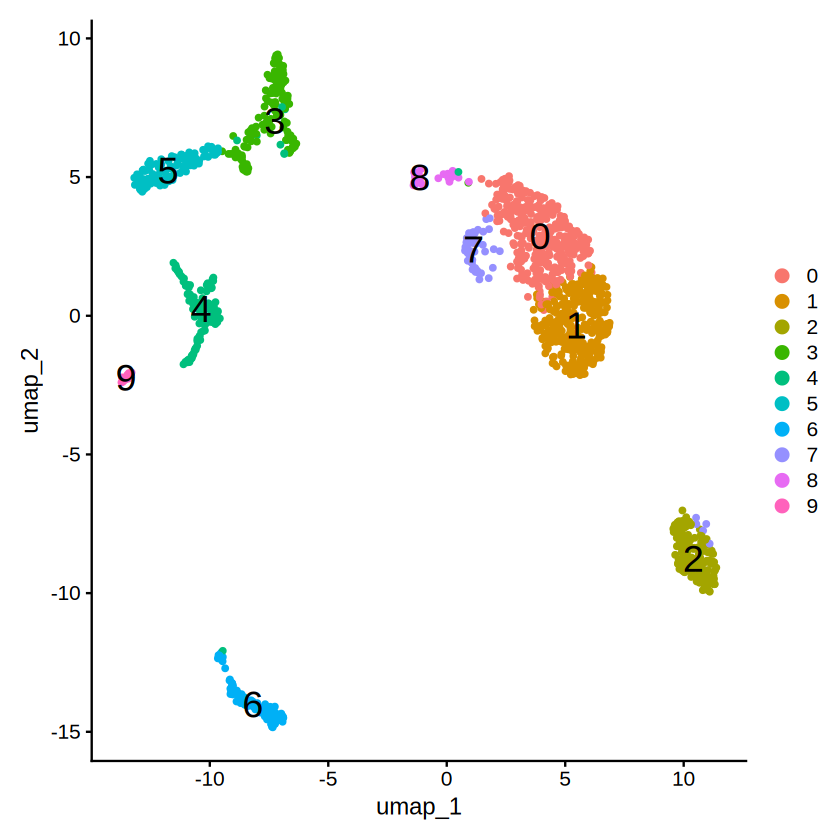

In [12]:
# Visualize clusters
DimPlot(seurat_obj, reduction = "umap", label = TRUE, label.size = 8)

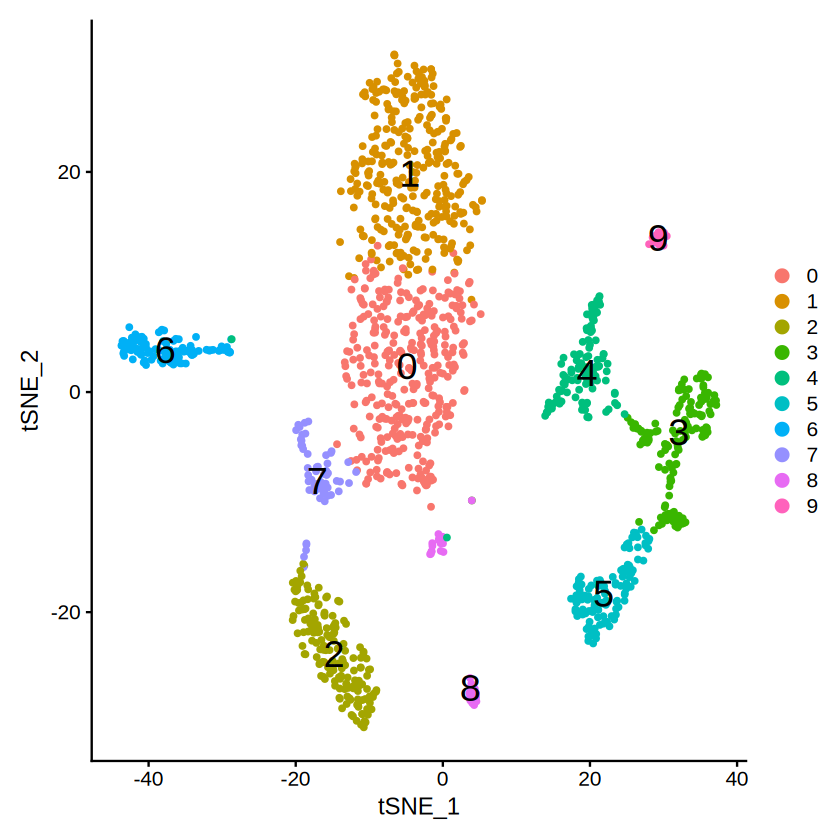

In [13]:
# Visualize tSNE
DimPlot(seurat_obj, reduction = "tsne", label = TRUE, label.size = 8)

## Find markers for all clusters

In [15]:
# Find markers for all clusters
seurat_obj.markers <- FindAllMarkers(seurat_obj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 1

Calculating cluster 2

Calculating cluster 2

Calculating cluster 3

Calculating cluster 3

Calculating cluster 4

Calculating cluster 4

Calculating cluster 5

Calculating cluster 5

Calculating cluster 6

Calculating cluster 6

Calculating cluster 7

Calculating cluster 7

Calculating cluster 8

Calculating cluster 8

Calculating cluster 9

Calculating cluster 9



In [61]:
# View top markers per cluster
seurat_obj.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC) |> filter(cluster == 4) |> print()

# A tibble: 10 × 7
# Groups:   cluster [1]
      p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene      
      <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>     
 1 3.39e- 6       3.64 0.298 0.173  5.10e- 2 4       AC020656.1
 2 3.23e-20       2.28 0.678 0.41   4.85e-16 4       LYZ       
 3 4.16e-44       2.11 0.967 0.811  6.26e-40 4       HLA-DRA   
 4 3.65e- 4       2.09 0.289 0.194  1   e+ 0 4       FCN1      
 5 9.42e-26       2.01 0.826 0.749  1.42e-21 4       HLA-DPB1  
 6 5.23e-30       1.91 0.843 0.538  7.87e-26 4       CST3      
 7 4.02e-25       1.87 0.826 0.721  6.06e-21 4       HLA-DPA1  
 8 4.03e-45       1.86 0.992 0.944  6.07e-41 4       CD74      
 9 7.48e-10       1.82 0.529 0.358  1.13e- 5 4       HLA-DQA1  
10 7.76e- 5       1.80 0.107 0.315  1   e+ 0 4       GABARAPL2 


## Check canonical cell type markers

In [68]:
# Define canonical markers for major lung cell types
markers <- list(
  #Epithelial = c("EPCAM", "KRT8", "KRT18", "KRT19"),
  #Myeloid = c("CD68", "CD14", "LYZ", "FCGR3A"),
  #Macrophages = c("CD68", "CD163", "MSR1", "MRC1"),
  Macrophage_M1 = c("CD80", "CD86", "IL1B", "TNF", "NOS2"),
  Macrophage_M2 = c("CD163", "MRC1", "MSR1", "CD209", "ARG1"),
  Monocytes = c("CD14", "FCGR3A", "S100A8", "S100A9"),
  Dendritic = c("CD1C", "CLEC9A", "FCER1A", "ITGAX"),
  T_cells = c("CD3D", "CD3E", "CD3G", "CD8A", "CD4"),
  T_naive = c("CCR7", "SELL", "TCF7", "LEF1"),
  T_activated = c("GZMA", "GZMB", "PRF1", "IFNG"),
  T_exhausted = c("PDCD1", "CTLA4", "HAVCR2", "LAG3", "TIGIT"),
  B_cells = c("CD79A", "CD79B", "MS4A1"),
  NK_cells = c("GNLY", "NKG7", "NCAM1"),
  #Endothelial = c("PECAM1", "VWF", "CDH5"),
  #Fibroblasts = c("COL1A1", "COL1A2", "DCN", "LUM"),
  Mast_cells = c("TPSAB1", "CPA3", "KIT")
)

In [69]:
# Get all available features in the dataset
available_features <- rownames(seurat_obj)

# Filter markers to only include those present in the dataset
markers_filtered <- lapply(markers, function(x) {
    x[x %in% available_features]
})

# Remove empty categories
markers_filtered <- markers_filtered[sapply(markers_filtered, length) > 0]

# Print filtered markers to see what's available
print(markers_filtered)


$Macrophage_M1
[1] "CD80" "CD86" "IL1B" "TNF" 

$Macrophage_M2
[1] "CD163" "MRC1"  "MSR1"  "CD209"

$Monocytes
[1] "CD14"   "FCGR3A" "S100A8" "S100A9"

$Dendritic
[1] "CD1C"   "CLEC9A" "FCER1A" "ITGAX" 

$T_cells
[1] "CD3D" "CD3E" "CD3G" "CD8A" "CD4" 

$T_naive
[1] "CCR7" "SELL" "TCF7" "LEF1"

$T_activated
[1] "GZMA" "GZMB" "PRF1" "IFNG"

$T_exhausted
[1] "PDCD1"  "CTLA4"  "HAVCR2" "LAG3"   "TIGIT" 

$B_cells
[1] "CD79A" "CD79B" "MS4A1"

$NK_cells
[1] "GNLY"  "NKG7"  "NCAM1"

$Mast_cells
[1] "TPSAB1" "CPA3"   "KIT"   



In [70]:
# 9 ~ Dendritic
# 8 ~ T activated
# 6 ~ Mast cells
# 5 ~ Monocytes
# 3 ~ Macrophage

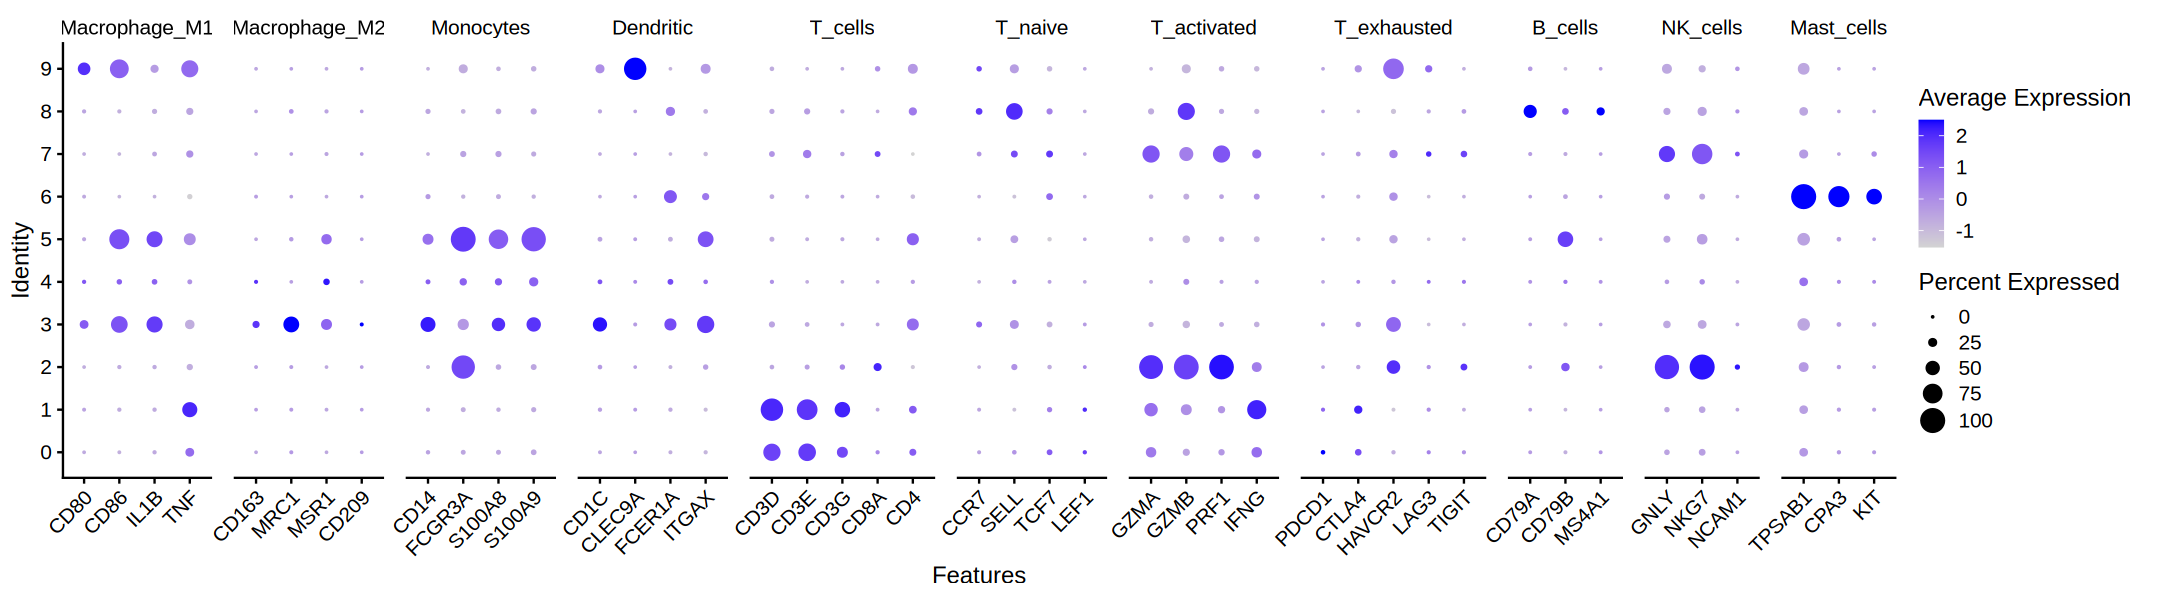

In [71]:
options(repr.plot.width = 18, repr.plot.height = 5)
# DotPlot for all major cell type markers
DotPlot(seurat_obj, features = markers_filtered) + RotatedAxis()

Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


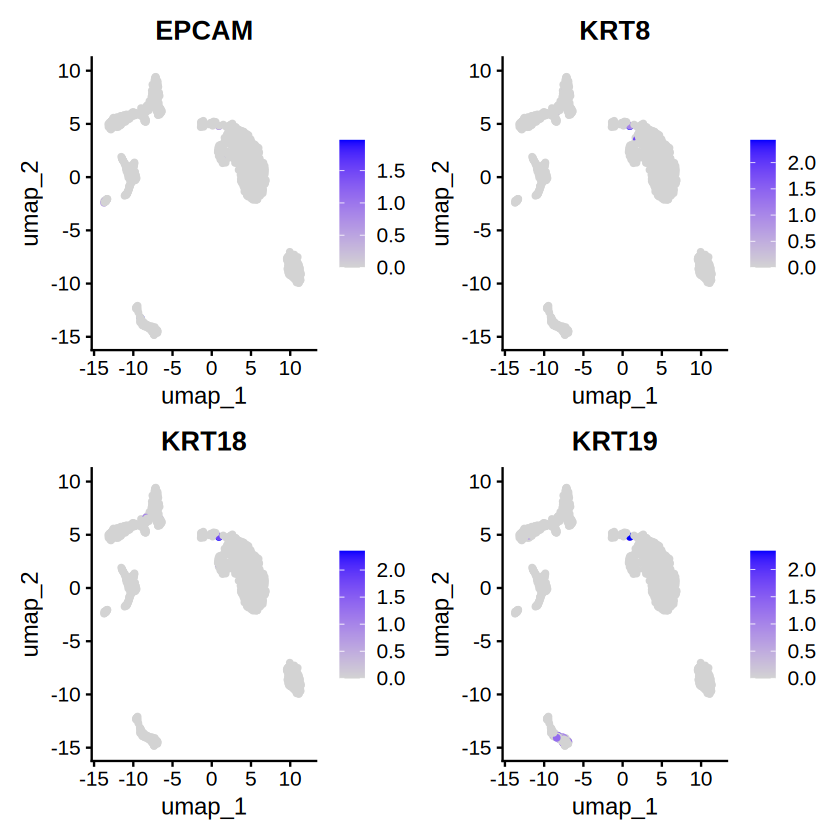

In [22]:
# Visualize epithelial markers
FeaturePlot(seurat_obj, features = c("EPCAM", "KRT8", "KRT18", "KRT19"), ncol = 2)

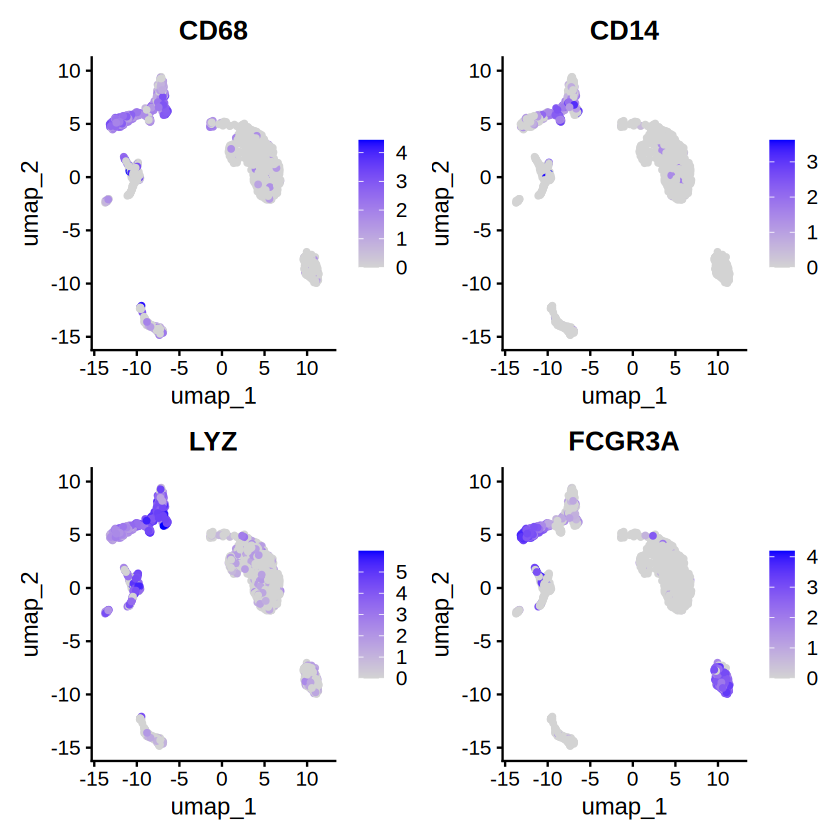

In [23]:
# Visualize myeloid markers
FeaturePlot(seurat_obj, features = c("CD68", "CD14", "LYZ", "FCGR3A"), ncol = 2)

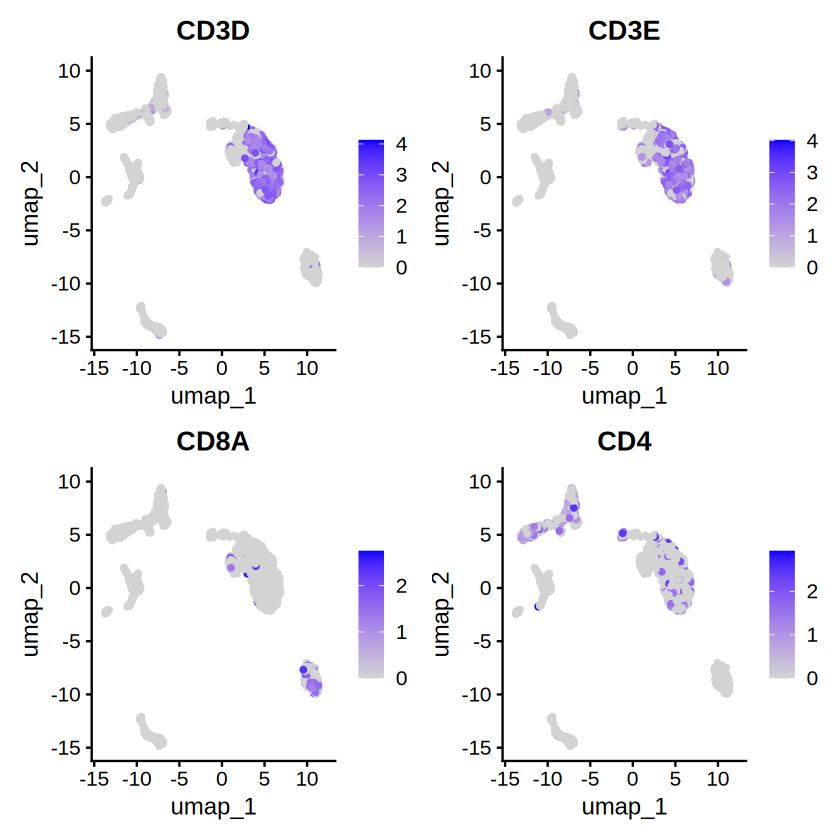

In [24]:
# Visualize T cell markers
FeaturePlot(seurat_obj, features = c("CD3D", "CD3E", "CD8A", "CD4"), ncol = 2)

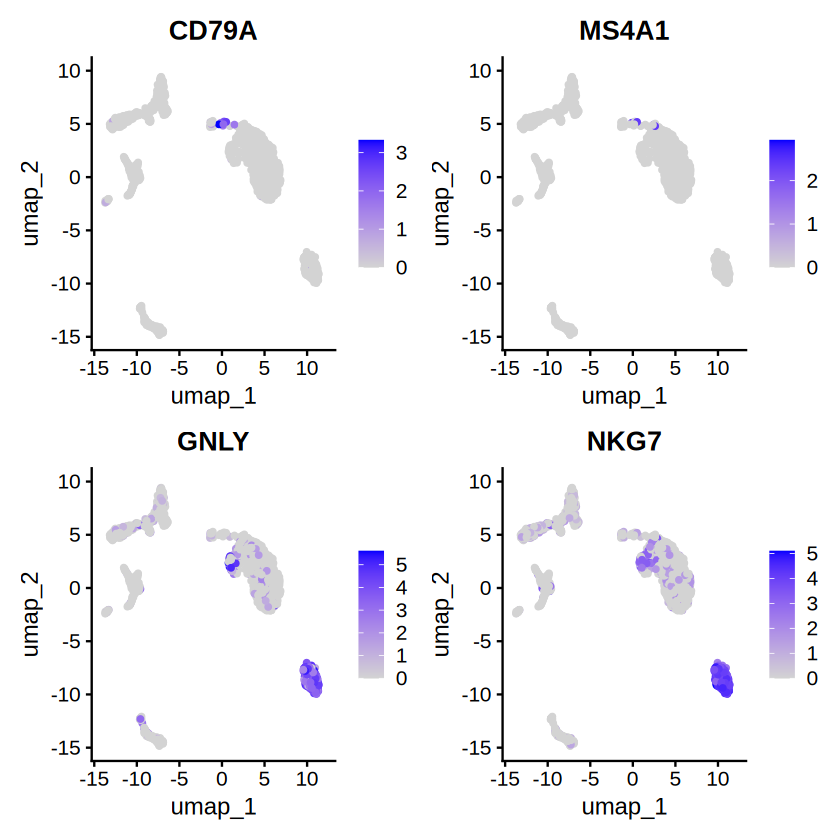

In [25]:
# Visualize B cell and NK cell markers
FeaturePlot(seurat_obj, features = c("CD79A", "MS4A1", "GNLY", "NKG7"), ncol = 2)

Warning message:
“The following requested variables were not found: VWF, CDH5”


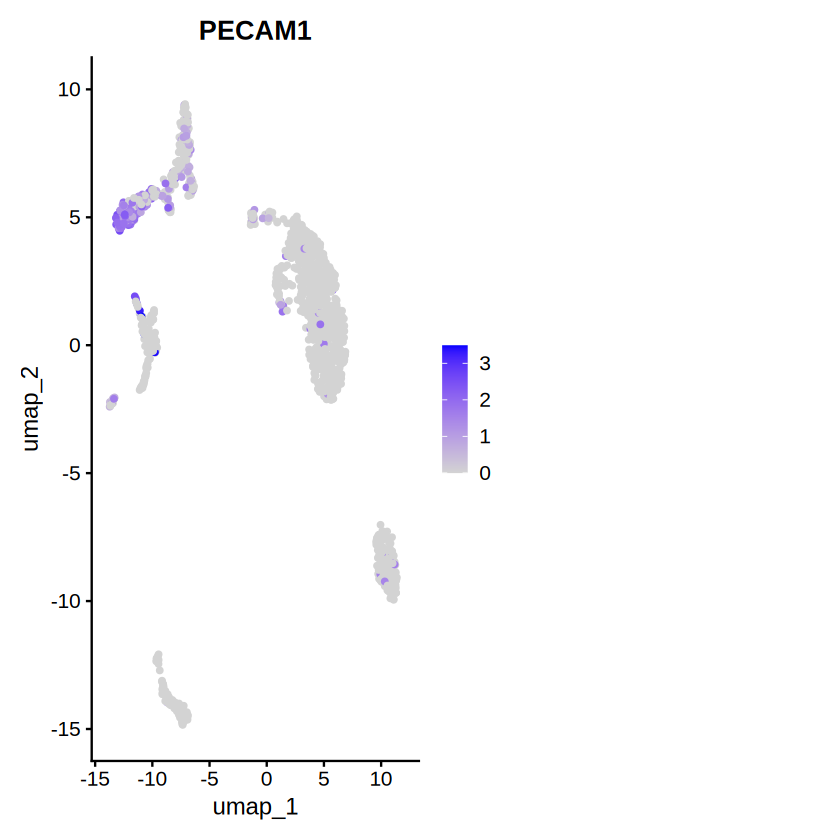

In [26]:
# Visualize endothelial markers
FeaturePlot(seurat_obj, features = c("PECAM1", "VWF", "CDH5"), ncol = 2)

Warning message:
“The following requested variables were not found: COL1A2, DCN, LUM”


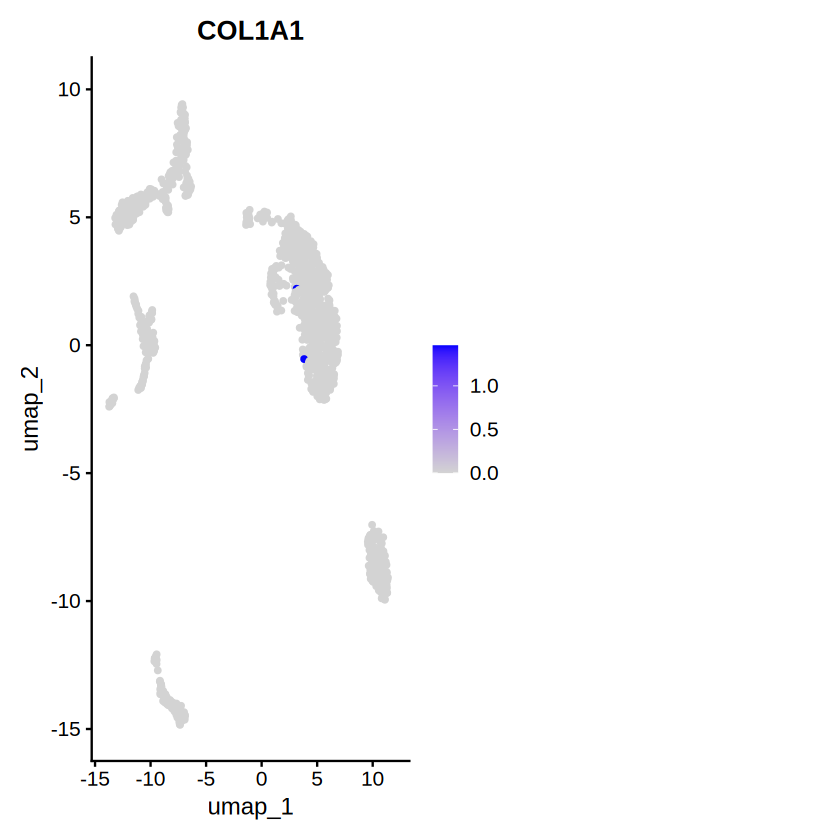

In [27]:
# Visualize fibroblast markers
FeaturePlot(seurat_obj, features = c("COL1A1", "COL1A2", "DCN", "LUM"), ncol = 2)

## Manual annotation based on marker expression

In [ ]:
0,1 ~ Tcell_naive/memory
2 ~ NK_cell
3 ~ Macrophage_M2
4 ~ Monocytes
5 ~ Macrophage_M1
6 ~ Mast cells
7 ~ Activated Tcell
8 ~ Bcell
9 ~ Dendritic


In [73]:
# Assign cell types to clusters based on marker expression
new.cluster.ids <- c(
  "Tcell_naive_memory",  # 0
  "Tcell_naive_memory",  # 1
  "NK_cell",             # 2
  "Macrophage_M2",       # 3
  "Monocytes",           # 4
  "Macrophage_M1",       # 5
  "Mast_cells",          # 6
  "Tcell_activated",     # 7
  "Bcell",               # 8
  "Dendritic"            # 9
)

# Apply annotations
names(new.cluster.ids) <- levels(seurat_obj)
seurat_obj <- RenameIdents(seurat_obj, new.cluster.ids)

# Store in metadata
seurat_obj$cell_type <- Idents(seurat_obj)

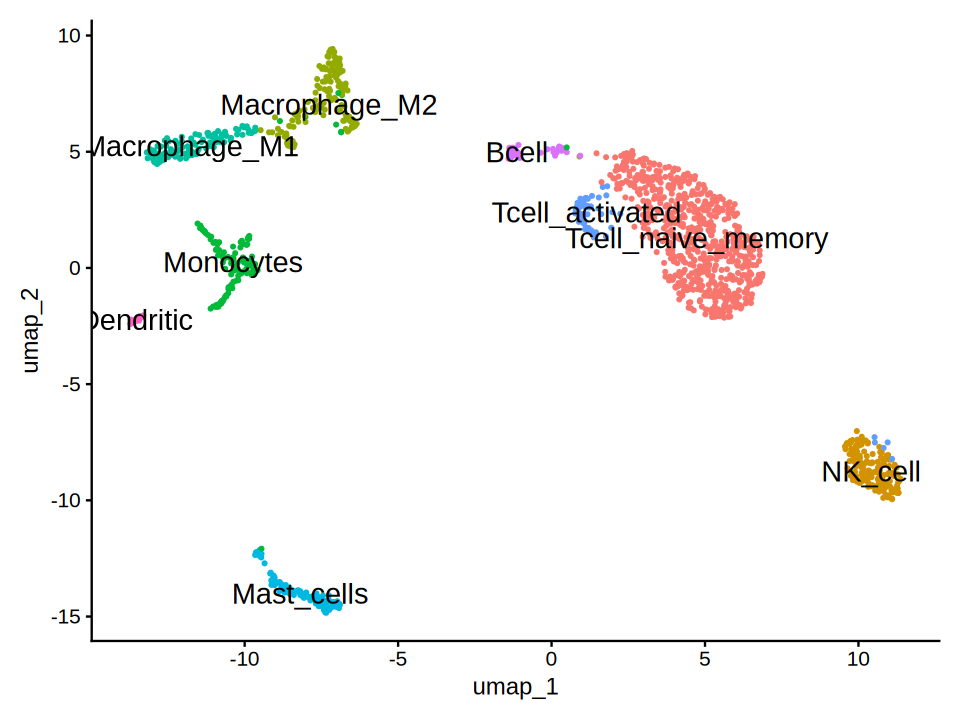

In [83]:
# Visualize annotated cell types
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(seurat_obj, reduction = "umap", label = TRUE, label.size = 6, pt.size = 0.5) + NoLegend()

In [84]:
# Cell type composition
table(seurat_obj$cell_type)


Tcell_naive_memory            NK_cell      Macrophage_M2          Monocytes 
               658                163                148                121 
     Macrophage_M1         Mast_cells    Tcell_activated              Bcell 
               115                104                 60                 43 
         Dendritic 
                24 

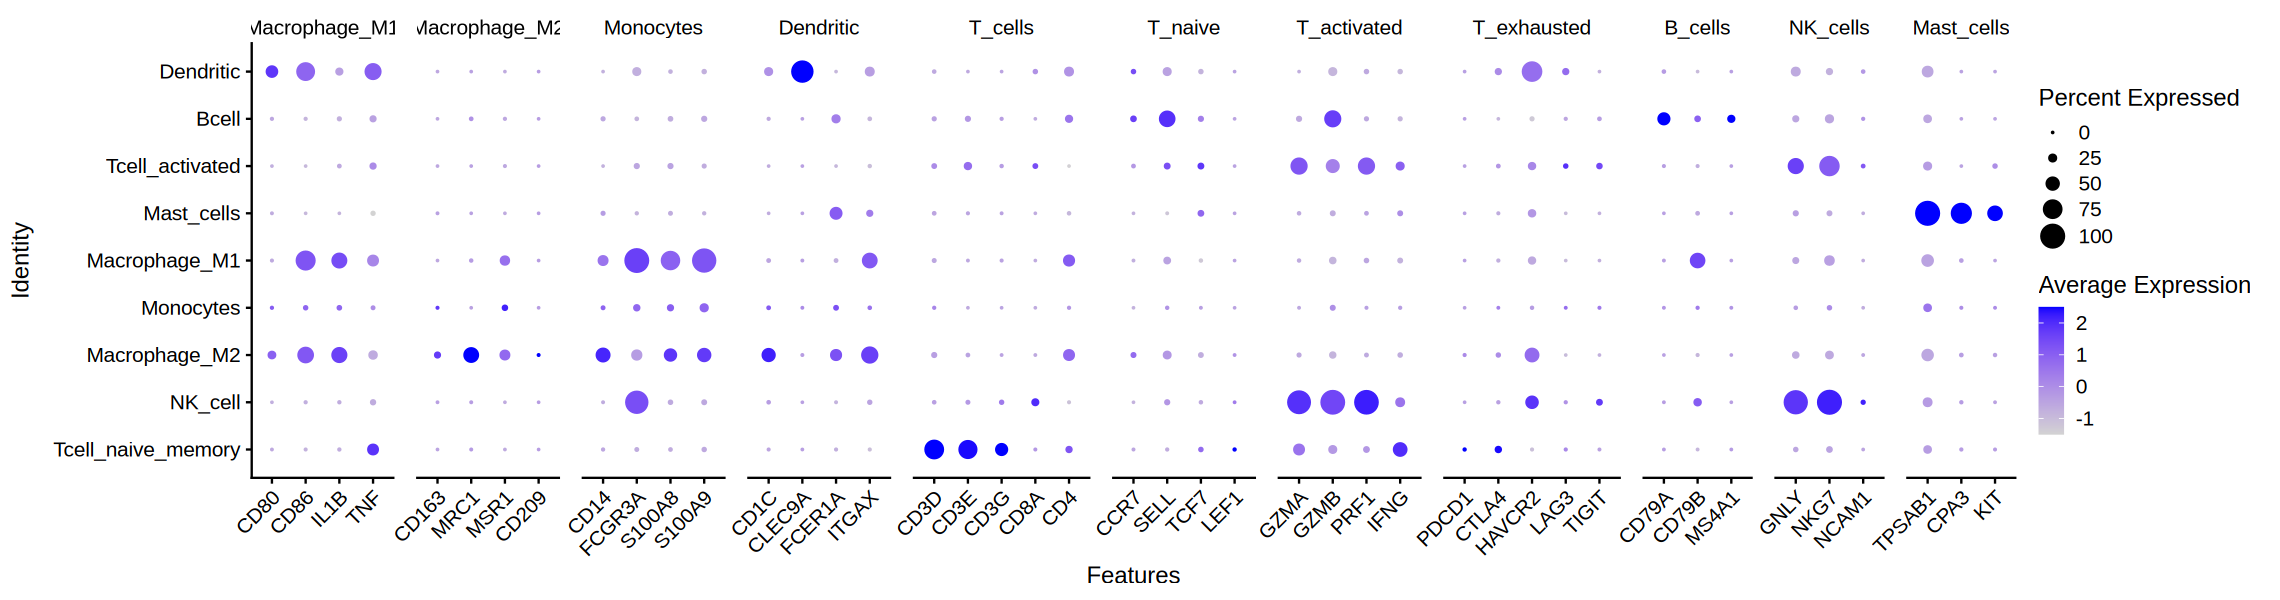

In [89]:
# Visualize marker expression on annotated cell types
options(repr.plot.width = 19, repr.plot.height = 5)
DotPlot(seurat_obj, features = markers_filtered) + RotatedAxis()

In [90]:
# Save annotated object
saveRDS(seurat_obj, file = "../data/singlecell/results/p1_t1_annotated.rds")